# Introduction to G20

## About G20 Countries
* G20 officially represents 43 key countries from every world region
* G20 members represent more than 80% of world GDP, 75% of international trade and 60% of the world population

## G20 Objectives
* Solving economic, legal, and environmental issues of global governance
* I.e: overseas tax evasion and pollution control, which nation-states by themselves cannot control effectively

## Indonesia's G20 Precidency
* Theme: Recover together, recover stronger
* Priority issues:
    * Global Health Architecture
    * Digital Transformation
    * Sustainable Energy Transition
    
    
Source: 
* https://www.g20.org
* https://www.theglobalist.com/g20-how-many-countries-really

# About this notebook

## Data
* Share of electricity in total energy consumption
* CO2 emissions from fuel (coal, oil, gas) combustion to produce energy (including electricity)
* Share of renewables in electricity production

Source: [enerdata.net](https://yearbook.enerdata.net)

## Objectives:
* Evaluating the trend of domestic electricity demand in relation to total energy consumption
* Taking a look at CO2 emissions trend (the consequence of non-renewable energy production)
* Evaluating the trend of renewables in electricity production


# Environment

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [ ]:
# Konsumsi energi
energy = pd.read_csv('world energy consumption.csv', sep = ';')

# Persentase konsumsi listrik terhadap total konsumsi energi
electricity_pct = pd.read_csv('share_of_electricity.csv', sep = ';')

# Jumlah emisi karbon dr pembakaran fossil fuel (termasuk utk memproduksi listrik)
emissions = pd.read_csv('co2_emissions.csv', sep = ';')

# Persentase produksi listrik terbarukan thd total produksi listrik
renew = pd.read_csv('renew_electricity.csv', sep = ';')

# G20

In [ ]:
g20 = ['Argentina', 
       'Australia', 
       'Brazil', 
       'Canada', 
       'China', 
       'France', 
       'Germany', 
       'India', 
       'Indonesia', 
       'Italy', 
       'Japan', 
       'South Korea', 
       'Mexico', 
       'Russia', 
       'Saudi Arabia', 
       'South Africa', 
       'Turkey', 
       'United Kingdom', 
       'United States', 
       'European Union']

In [ ]:
energy = energy.drop(columns = ['2020 - 2021 (%) ', '2000 - 2021 (%/year) '])

In [ ]:
energy_g20 = energy.loc[energy['Location'].isin(g20)]
elct_pct_g20 = electricity_pct.loc[electricity_pct['Location'].isin(g20)]
emissions_g20 = emissions.loc[emissions['Location'].isin(g20)]
renew_g20 = renew.loc[renew['Location'].isin(g20)]
covid_g20 = covid.loc[covid['location'].isin(g20)]

NameError: ignored

In [ ]:
def change_df(df):
    df = df.replace(',', '.', regex = True)
    cols = df.iloc[:, 1:].columns
    
    for col in cols:
        df.loc[:, col] = df[col].astype('float')
        
    return df

In [ ]:
renew_g20 = change_df(renew_g20)

In [ ]:
elct_pct_g20 = change_df(elct_pct_g20)

# Visualization

In [ ]:
def transpose_df(df):
    df = df.transpose().reset_index()
    df.columns = df.iloc[0]
    
    df = df.drop(0, axis = 0)
    
    df = df.rename(columns = {'Location': 'Year'})
    
    
    return df

## Total energy consumption

In [ ]:
energy_g20_t = transpose_df(energy_g20)
energy_g20_t.head()

,Year,European Union,France,Germany,Italy,United Kingdom,Turkey,Russia,Canada,United States,...,Brazil,Mexico,China,India,Indonesia,Japan,South Korea,Australia,South Africa,Saudi Arabia
1,1990,1443.0,224.0,352.0,146.0,206.0,51.0,879.0,211.0,1910.0,...,141.0,124.0,874.0,280.0,99.0,439.0,94.0,86.0,90.0,58.0
2,1991,1438.0,237.0,345.0,150.0,213.0,51.0,871.0,210.0,1925.0,...,143.0,130.0,848.0,293.0,103.0,443.0,101.0,85.0,92.0,68.0
3,1992,1399.0,234.0,338.0,149.0,213.0,53.0,795.0,216.0,1963.0,...,145.0,131.0,877.0,304.0,108.0,453.0,111.0,87.0,88.0,77.0
4,1993,1394.0,238.0,335.0,148.0,215.0,56.0,751.0,223.0,1998.0,...,149.0,133.0,929.0,313.0,119.0,456.0,125.0,91.0,94.0,80.0
5,1994,1390.0,231.0,333.0,147.0,216.0,56.0,657.0,231.0,2035.0,...,156.0,136.0,973.0,328.0,119.0,481.0,133.0,91.0,98.0,84.0


In [ ]:
energy_g20_t['Total'] = energy_g20_t.loc[:, energy_g20_t.columns[1:]].mean(axis = 'columns')

In [ ]:
energy_g20_t.iloc[-10:]

,Year,European Union,France,Germany,Italy,United Kingdom,Turkey,Russia,Canada,United States,...,Mexico,China,India,Indonesia,Japan,South Korea,Australia,South Africa,Saudi Arabia,Total
23,2012,1461.0,258.0,315.0,161.0,194.0,117.0,725.0,269.0,2152.0,...,192.0,2821.0,732.0,204.0,455.0,271.0,126.0,131.0,189.0,556.70
24,2013,1445.0,259.0,322.0,155.0,191.0,114.0,704.0,275.0,2191.0,...,192.0,2912.0,753.0,197.0,456.0,272.0,127.0,130.0,188.0,562.95
25,2014,1392.0,249.0,308.0,147.0,180.0,119.0,706.0,282.0,2217.0,...,188.0,2986.0,804.0,206.0,442.0,277.0,127.0,138.0,207.0,568.10
26,2015,1408.0,252.0,309.0,153.0,182.0,129.0,692.0,280.0,2193.0,...,185.0,3001.0,824.0,204.0,435.0,283.0,127.0,129.0,216.0,569.20
27,2016,1419.0,248.0,310.0,151.0,179.0,137.0,713.0,293.0,2169.0,...,185.0,2987.0,840.0,210.0,432.0,293.0,127.0,135.0,215.0,570.65
28,2017,1443.0,247.0,311.0,153.0,177.0,147.0,727.0,303.0,2162.0,...,181.0,3098.0,883.0,221.0,437.0,295.0,128.0,136.0,219.0,582.15
29,2018,1433.0,246.0,304.0,151.0,176.0,145.0,772.0,307.0,2222.0,...,187.0,3248.0,927.0,232.0,431.0,296.0,129.0,135.0,214.0,596.20
30,2019,1408.0,242.0,297.0,149.0,171.0,147.0,773.0,306.0,2220.0,...,185.0,3396.0,938.0,241.0,417.0,294.0,129.0,140.0,215.0,602.05
31,2020,1312.0,218.0,279.0,138.0,152.0,147.0,741.0,282.0,2029.0,...,167.0,3471.0,885.0,216.0,386.0,285.0,127.0,128.0,215.0,577.00
32,2021,1372.0,235.0,286.0,147.0,156.0,163.0,811.0,289.0,2123.0,...,167.0,3652.0,927.0,226.0,400.0,298.0,124.0,137.0,219.0,605.80


Text(0, 0.5, 'Total energy consumption (Mtoe)')

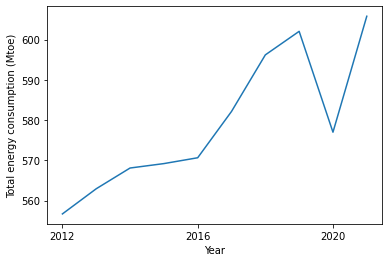

In [ ]:
sns.lineplot(data = energy_g20_t.iloc[-10:], x = 'Year', y = 'Total')
plt.xticks(['2012', '2016', '2020'])
plt.ylabel('Total energy consumption (Mtoe)')

* Konsumsi energi meningkat tiap tahunnya
* Terjadi penurunan di tahun 2020
* Penurunan di 2020 disebabkan oleh pandemi Covid-19

## Electricity consumption relative to total energy consumption

In [ ]:
elct_g20_t = transpose_df(elct_pct_g20)
elct_g20_t.head()

,Year,European Union,France,Germany,Italy,United Kingdom,Turkey,Russia,Canada,United States,...,Brazil,Mexico,China,India,Indonesia,Japan,South Korea,Australia,South Africa,Saudi Arabia
1,1990,15.9,18.0,15.9,15.8,16.8,9.2,11.3,22.7,17.4,...,15.9,10.2,5.6,8.3,3.1,21.2,11.6,19.3,23.0,12.0
2,1991,16.1,17.8,16.1,15.8,16.6,9.4,11.2,23.2,18.3,...,16.1,9.8,6.2,8.8,3.3,21.5,11.6,19.8,23.3,12.3
3,1992,16.4,18.3,16.3,16.1,16.8,10.1,11.4,23.0,18.1,...,16.2,10.1,6.8,9.2,3.5,21.5,11.5,19.8,22.7,11.9
4,1993,16.5,18.8,16.2,16.2,16.9,10.3,11.0,22.9,18.5,...,16.5,10.4,7.2,9.7,3.8,21.5,11.6,19.7,23.5,12.7
5,1994,16.7,19.3,16.3,16.9,16.7,11.2,11.6,22.4,18.6,...,16.3,10.7,7.9,10.1,4.1,22.1,12.3,19.7,23.9,12.4


In [ ]:
print('mean  | median')

for i in range(1,32):
    print('{:.2f}'.format(elct_g20_t.iloc[i, 1:].mean()), '| {:.2f}'.format(elct_g20_t.iloc[i, 1:].median()))

mean  | median
14.44 | 15.95
14.57 | 16.15
14.79 | 16.20
15.07 | 16.30
15.22 | 16.45
15.35 | 16.30
15.71 | 16.50
16.05 | 16.65
16.33 | 16.95
16.81 | 17.65
17.07 | 17.65
17.40 | 18.05
17.55 | 18.15
17.66 | 18.45
18.02 | 18.50
18.28 | 18.75
18.59 | 19.30
18.79 | 19.15
18.89 | 19.10
19.18 | 19.15
19.47 | 20.05
19.61 | 19.85
19.67 | 19.80
19.94 | 20.30
19.93 | 20.20
20.29 | 20.45
20.21 | 20.30
20.49 | 20.75
20.39 | 20.70
21.18 | 21.50
21.04 | 21.50


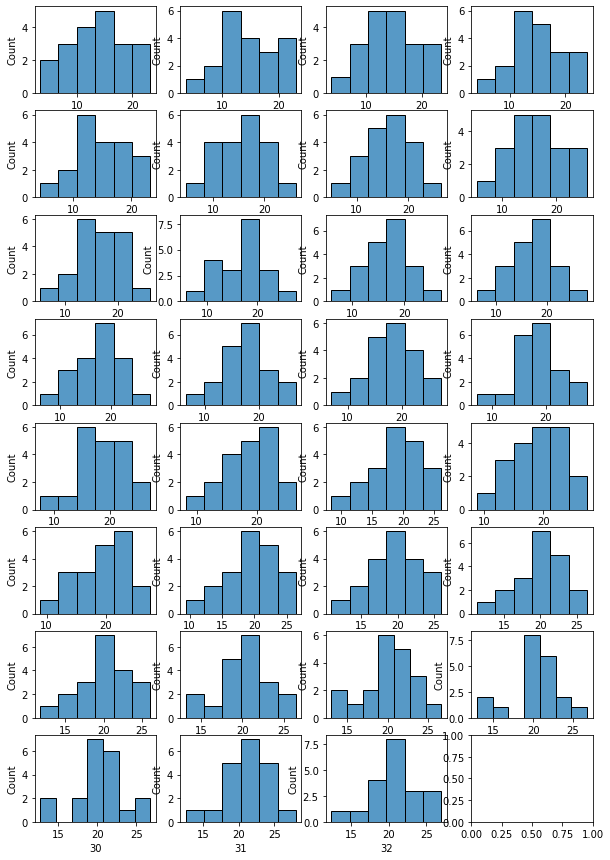

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(10,15))
rows = range(1,32)

for row, ax in zip(rows, axes.flatten()): 
    sns.histplot(elct_g20_t.iloc[row, 1:], ax=ax)

* Mean dan median ga jauh berbeda, distribusi cenderung normal
* Dipilih rata-rata utk merepresentasikan persentase konsumsi listrik per tahun


In [ ]:
elct_g20_t['Average'] = elct_g20_t.loc[:, elct_g20_t.columns[1:]].mean(axis = 'columns')

Text(0, 0.5, 'Share of electricity consumption (%)')

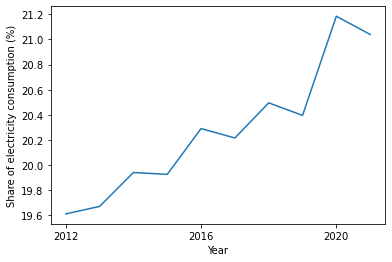

In [ ]:
sns.lineplot(data = elct_g20_t.iloc[-10:], x = 'Year', y = 'Average')
plt.xticks(['2012', '2016', '2020'])
plt.ylabel('Share of electricity consumption (%)')

* Porsi kebutuhan akan listrik dari total energi yang dikonsumsi memiliki tren positif
* Kebutuhan akan energi, khususnya listrik, akan semakin tinggi

## Renewable electricity production

In [ ]:
renew_g20_t = transpose_df(renew_g20)
renew_g20_t.head()

,Year,European Union,France,Germany,Italy,United Kingdom,Turkey,Russia,Canada,United States,...,Brazil,Mexico,China,India,Indonesia,Japan,South Korea,Australia,South Africa,Saudi Arabia
1,1990,14.1,14.1,3.9,17.7,2.4,40.4,15.3,62.4,12.0,...,94.5,24.7,20.4,24.8,20.9,12.3,6.0,10.1,1.7,0.0
2,1991,14.5,14.0,3.9,22.0,2.1,37.8,15.7,61.4,11.3,...,94.6,22.4,18.5,23.1,20.6,13.0,4.4,10.8,2.2,0.0
3,1992,15.2,16.1,4.4,21.8,2.5,39.6,17.0,61.7,10.5,...,94.4,25.7,17.6,21.0,23.8,11.2,3.9,10.3,1.2,0.0
4,1993,15.5,14.8,4.6,21.7,2.2,46.2,18.2,61.7,11.0,...,95.3,25.4,18.1,19.8,19.8,12.9,4.1,10.8,0.9,0.0
5,1994,15.8,17.5,5.2,22.1,2.6,39.2,20.1,60.4,10.3,...,95.4,19.0,18.1,21.5,15.7,9.0,2.5,10.4,1.4,0.0


In [ ]:
print('mean  | median')

for i in range(1,32):
    print('{:.2f}'.format(renew_g20_t.iloc[i, 1:].mean()), '| {:.2f}'.format(renew_g20_t.iloc[i, 1:].median()))

mean  | median
21.16 | 15.10
21.65 | 16.55
22.11 | 16.80
21.42 | 16.65
21.45 | 16.20
20.96 | 15.35
20.53 | 14.70
20.42 | 15.90
19.48 | 15.30
19.28 | 14.85
19.21 | 15.95
19.17 | 13.75
18.55 | 12.75
18.99 | 14.00
18.86 | 14.40
19.15 | 13.85
18.63 | 14.55
18.82 | 15.85
19.76 | 14.90
20.33 | 16.45
20.53 | 15.40
20.97 | 15.70
22.20 | 17.45
22.54 | 17.45
23.21 | 16.35
24.05 | 17.80
24.64 | 17.35
26.21 | 19.15
27.86 | 20.30
29.90 | 23.45
29.33 | 23.55


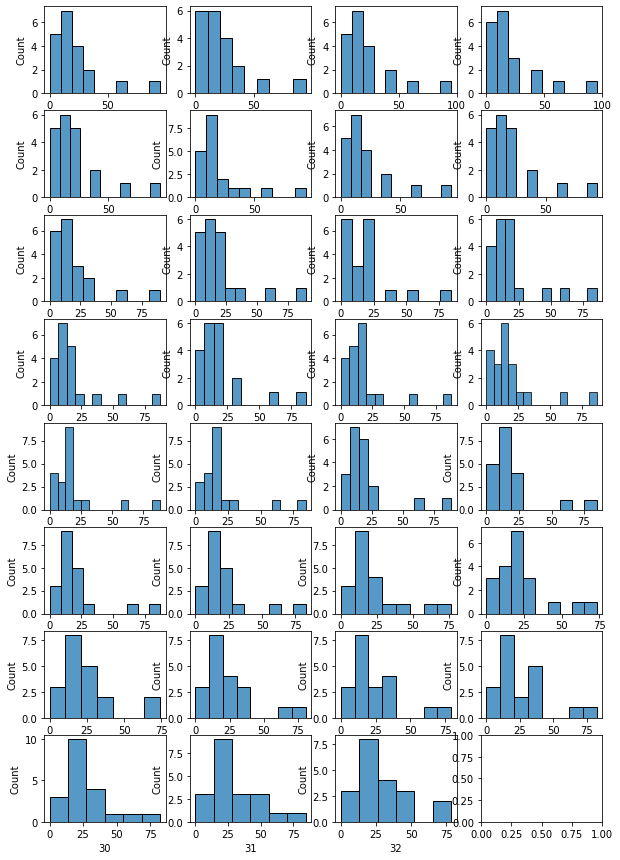

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(10,15))
rows = range(1,32)

for row, ax in zip(rows, axes.flatten()): 
    sns.histplot(renew_g20_t.iloc[row, 1:], ax=ax)

* Mean dan median tiap tahunnya jauh berbeda, skewed
* Dipilih median untuk merepresentasikan porsi produksi listrik terbarukan dari total produksi listrik

In [ ]:
renew_g20_t['Median'] = renew_g20_t.loc[:, renew_g20_t.columns[1:]].median(axis = 'columns')

Text(0, 0.5, 'Renewables in electricity production (%)')

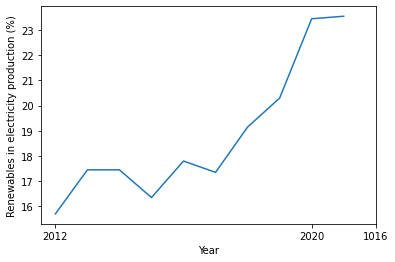

In [ ]:
sns.lineplot(data = renew_g20_t.iloc[-10:], x = 'Year', y = 'Median')
plt.xticks(['2012','1016', '2020'])
plt.ylabel('Renewables in electricity production (%)')

In [ ]:
renew_plot = renew_g20_t.iloc[-10:, 1:-1].mean().sort_values(ascending = False)
renew_plot

0
Brazil            79.38
Canada            65.46
Italy             39.10
Germany           33.18
Turkey            32.37
European Union    32.02
United Kingdom    28.56
China             24.79
Argentina         24.28
France            19.15
India             17.67
Russia            17.46
Australia         16.80
Mexico            16.35
United States     16.06
Japan             15.66
Indonesia         14.21
South Africa       5.03
South Korea        4.21
Saudi Arabia       0.03
dtype: float64

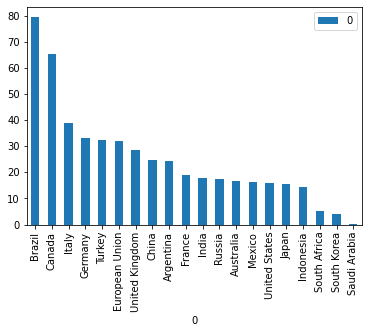

In [ ]:
pd.DataFrame(renew_plot).plot(kind = 'bar')

* Persentase listrik yang diproduksi secara sustainable berfluktuasi, namun meningkat beberapa tahun terakhir
* Meski mengalami peningkatan, di mayoritas negara persentasenya masih relatif kecil (<40%)

## CO2 emissions from fuel combustion

In [ ]:
emissions_g20_t = transpose_df(emissions_g20)
emissions_g20_t.head()

,Year,European Union,France,Germany,Italy,United Kingdom,Turkey,Russia,Canada,United States,...,Brazil,Mexico,China,India,Indonesia,Japan,South Korea,Australia,South Africa,Saudi Arabia
1,1990,3558,359,964,397,556,136,2189,430,4866,...,194,265,2255,551,145,1056,243,261,252,156
2,1991,3540,388,947,398,564,136,2190,423,4814,...,199,284,2370,593,157,1063,268,263,248,162
3,1992,3413,376,900,398,558,142,2017,436,4892,...,204,286,2462,621,165,1071,291,267,245,177
4,1993,3353,357,889,393,541,148,1849,435,5015,...,211,296,2631,649,179,1064,317,271,253,187
5,1994,3331,351,873,388,533,146,1629,452,5096,...,219,321,2757,690,190,1115,342,275,258,200


In [ ]:
emissions_g20_t['Total'] = emissions_g20_t.loc[:, emissions_g20_t.columns[1:]].mean(axis = 'columns')

Text(0, 0.5, 'Total CO2 emissions (MtCO2)')

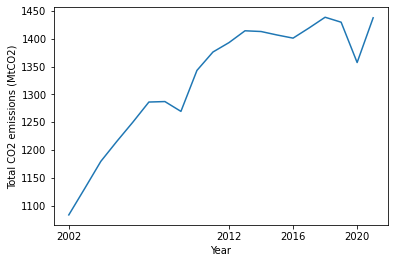

In [ ]:
sns.lineplot(data = emissions_g20_t.iloc[-20:], x = 'Year', y = 'Total')
plt.xticks(['2002', '2012', '2016', '2020'])
plt.ylabel('Total CO2 emissions (MtCO2)')

* Sebagai akibat dari naiknya kebutuhan akan listrik serta masih sedikitnya produksi listrik terbarukan, emisi CO2 juga cenderung meningkat tiap tahunnya
* Hal ini dapat berakibat buruk pada iklim, kesehatan, dan biodiversitas

### Renewables VS CO2 Emissions

In [ ]:
renew_g20.head()

,Location,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
5,European Union,14.1,14.5,15.2,15.5,15.8,15.5,15.2,15.5,16.0,...,25.7,28.6,30.3,30.4,30.7,30.5,32.8,34.5,39.0,37.7
8,France,14.1,14.0,16.1,14.8,17.5,15.9,14.2,13.9,13.5,...,15.7,18.0,17.4,16.7,18.4,17.4,20.4,20.6,24.3,22.6
9,Germany,3.9,3.9,4.4,4.6,5.2,5.7,5.6,4.8,5.2,...,23.7,24.8,26.8,30.0,30.0,34.0,35.6,40.6,44.8,41.5
10,Italy,17.7,22.0,21.8,21.7,22.1,18.9,21.0,20.3,20.3,...,31.5,39.3,43.7,39.0,37.9,35.7,40.1,40.0,42.4,41.4
17,United Kingdom,2.4,2.1,2.5,2.2,2.6,2.5,2.1,2.4,2.8,...,12.2,15.7,19.9,25.6,25.3,30.1,33.8,37.9,44.4,40.7


In [ ]:
population = pd.read_csv('world population.csv', sep = ';')
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [ ]:
pop_g20 = population.loc[population['Country Name'].isin(g20) | population['Country Code'].isin(['KOR', 'RUS', 'TUR'])]
len(pop_g20['Country Name'].unique())

20

In [ ]:
def change_country(x):
  if x == 'Korea, Rep.':
    x = 'South Korea'
  elif x == 'Russian Federation':
    x = 'Russia'
  elif x == 'Turkiye':
    x = 'Turkey'
  
  return x

In [ ]:
pop_g20['Country Name'] = pop_g20['Country Name'].map(change_country)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pop_g20.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
9,Argentina,ARG,"Population, total",SP.POP.TOTL,20481781.0,20817270.0,21153042.0,21488916.0,21824427.0,22159644.0,...,4.173327e+07,4.220294e+07,4.266950e+07,4.313197e+07,4.359037e+07,4.404481e+07,4.449450e+07,4.493871e+07,4.537676e+07,4.580875e+07
13,Australia,AUS,"Population, total",SP.POP.TOTL,10276477.0,10483000.0,10742000.0,10950000.0,11167000.0,11388000.0,...,2.273346e+07,2.312813e+07,2.347569e+07,2.381600e+07,2.419091e+07,2.460186e+07,2.498269e+07,2.536574e+07,2.569327e+07,2.573926e+07
29,Brazil,BRA,"Population, total",SP.POP.TOTL,72179235.0,74311338.0,76514329.0,78772647.0,81064572.0,83373533.0,...,1.992873e+08,2.010359e+08,2.027637e+08,2.044718e+08,2.061631e+08,2.078338e+08,2.094693e+08,2.110495e+08,2.125594e+08,2.139934e+08
35,Canada,CAN,"Population, total",SP.POP.TOTL,17909009.0,18271000.0,18614000.0,18964000.0,19325000.0,19678000.0,...,3.471422e+07,3.508295e+07,3.543744e+07,3.570291e+07,3.610949e+07,3.654524e+07,3.706508e+07,3.760123e+07,3.803720e+07,3.824611e+07
40,China,CHN,"Population, total",SP.POP.TOTL,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,...,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.411100e+09,1.412360e+09


In [ ]:
pop_2021 = pop_g20.loc[:,['Country Name', '2021']]

In [ ]:
renew_2021 = renew_g20.loc[:,['Location', '2021']]

In [ ]:
emi_2021 = emissions_g20.loc[:,['Location', '2021']]

In [ ]:
pop_emi = pd.merge(pop_2021, emi_2021, left_on = 'Country Name', right_on = 'Location')
pop_emi.head()

,Country Name,2021_x,Location,2021_y
0,Argentina,4.580875e+07,Argentina,155
1,Australia,2.573926e+07,Australia,365
2,Brazil,2.139934e+08,Brazil,450
3,Canada,3.824611e+07,Canada,546
4,China,1.412360e+09,China,10398


In [ ]:
pop_emi['emi_per_pop_toe'] = pop_emi['2021_y'] / pop_emi['2021_x'] * 1000000
pop_emi.head()

,Country Name,2021_x,Location,2021_y,emi_per_pop,emi_per_pop_toe
0,Argentina,4.580875e+07,Argentina,155,3.383633,3.383633
1,Australia,2.573926e+07,Australia,365,14.180674,14.180674
2,Brazil,2.139934e+08,Brazil,450,2.102868,2.102868
3,Canada,3.824611e+07,Canada,546,14.275962,14.275962
4,China,1.412360e+09,China,10398,7.362146,7.362146


In [ ]:
pop_emi = pop_emi.drop(columns = 'emi_per_pop')

In [ ]:
pop_emi

,Country Name,2021_x,Location,2021_y,emi_per_pop_toe
0,Argentina,4.580875e+07,Argentina,155,3.383633
1,Australia,2.573926e+07,Australia,365,14.180674
2,Brazil,2.139934e+08,Brazil,450,2.102868
3,Canada,3.824611e+07,Canada,546,14.275962
4,China,1.412360e+09,China,10398,7.362146
5,Germany,8.312928e+07,Germany,652,7.843205
6,European Union,4.469467e+08,European Union,2657,5.944780
7,France,6.749934e+07,France,301,4.459303
8,United Kingdom,6.732657e+07,United Kingdom,321,4.767806
9,Indonesia,2.763618e+08,Indonesia,537,1.943105


In [ ]:
emi_per_pop = pop_emi.loc[:,['Location', 'emi_per_pop_toe']]

In [ ]:
emi_per_pop

,Location,emi_per_pop_toe
0,Argentina,3.383633
1,Australia,14.180674
2,Brazil,2.102868
3,Canada,14.275962
4,China,7.362146
5,Germany,7.843205
6,European Union,5.944780
7,France,4.459303
8,United Kingdom,4.767806
9,Indonesia,1.943105


In [ ]:
emi_ren = pd.merge(emi_per_pop , renew_2021, left_on = 'Location', right_on = 'Location')
emi_ren

,Location,emi_per_pop_toe,2021
0,Argentina,3.383633,24.5
1,Australia,14.180674,26.7
2,Brazil,2.102868,78.4
3,Canada,14.275962,68.0
4,China,7.362146,28.8
5,Germany,7.843205,41.5
6,European Union,5.944780,37.7
7,France,4.459303,22.6
8,United Kingdom,4.767806,40.7
9,Indonesia,1.943105,18.7


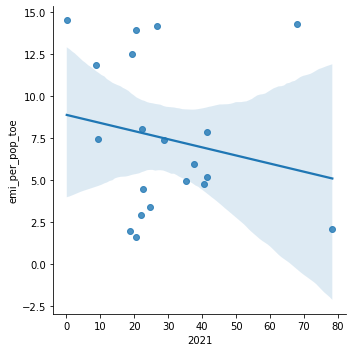

In [ ]:
sns.lmplot(y = 'emi_per_pop_toe', x = '2021', data = emi_ren)

In [ ]:
area = pd.read_csv('country area.csv')
area.head()

,rank,country,area
0,1,Russia,17098242
1,2,Canada,9984670
2,3,China,9706961
3,4,United States,9372610
4,5,Brazil,8515767


In [ ]:
area_g20 = area.loc[area['country'].isin(g20)]
len(area_g20)

19

In [ ]:
area_g20.sort_values(by = 'country')

,rank,country,area
7,8,Argentina,2780400
5,6,Australia,7692024
4,5,Brazil,8515767
1,2,Canada,9984670
2,3,China,9706961
48,49,France,551695
62,63,Germany,357114
6,7,India,3287590
14,15,Indonesia,1904569
72,73,Italy,301336


In [ ]:
g20.sort()

In [ ]:
g20

['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'European Union',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'South Korea',
 'Turkey',
 'United Kingdom',
 'United States']

In [ ]:
EU = 'Austria, Belgium, Bulgaria, Croatia, Republic of Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain, Sweden'

In [ ]:
EU = EU.split(", ")

In [ ]:
EU

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Republic of Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']

In [ ]:
EU.remove('Germany')
EU

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Republic of Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'Greece',
 'Hungary',
 'Ireland',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']

In [ ]:
for x in EU:
  print(f'"{x}",')

"Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Republic of Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"Greece",
"Hungary",
"Ireland",
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovakia",
"Slovenia",
"Spain",
"Sweden",


In [ ]:
pd.DataFrame(EU)

,0
0,Austria
1,Belgium
2,Bulgaria
3,Croatia
4,Republic of Cyprus
5,Czech Republic
6,Denmark
7,Estonia
8,Finland
9,Greece


## Covid

In [ ]:
covid_g20 = covid.loc[covid['location'].isin(g20)]

In [ ]:
covid_g20['date'].tail()

219090    2022-10-29
219091    2022-10-30
219092    2022-10-31
219093    2022-11-01
219094    2022-11-02
Name: date, dtype: object

([<matplotlib.axis.XTick at 0x7fe3e6160090>,
 <a list of 4 Text major ticklabel objects>)

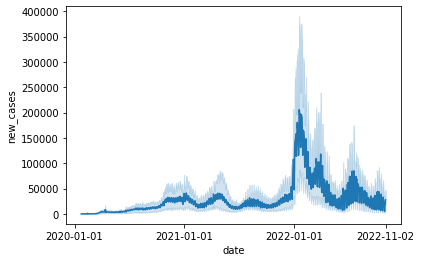

In [ ]:
sns.lineplot(data = covid_g20, x = 'date', y = 'new_cases')
plt.xticks(['2020-01-01', '2021-01-01', '2022-01-01', '2022-11-02'])

# Conclusion

* Porsi kebutuhan akan listrik dari total energi yang dikonsumsi memiliki tren positif
* Kebutuhan akan energi, khususnya listrik, akan semakin tinggi
* Persentase listrik yang diproduksi secara sustainable berfluktuasi, namun meningkat beberapa tahun terakhir
* Meski mengalami peningkatan, di mayoritas negara persentase produksi listrik dengan sumber energi terbarukan masih relatif kecil (<40%)
* Sebagai akibat dari naiknya kebutuhan akan listrik serta masih sedikitnya produksi listrik terbarukan, emisi CO2 juga cenderung meningkat tiap tahunnya yang dapat berakibat butuk pada iklim, kesehatan, dan biodiversitas


# Data Output

In [ ]:
elct_g20_t.to_excel('electricity.xlsx', index = False)
emissions_g20_t.to_excel('emissions.xlsx', index = False)
renew_g20_t.to_excel('renewables.xlsx', index = False)
energy_g20_t.to_excel('energy.xlsx', index = False)